In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


In [6]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import shutil


In [7]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

In [8]:
files = glob.glob('filtered_wv_models/*')
m = len(files)
print("Number of files in models", m)


Number of files in models 5425


In [9]:
y = np.zeros((m,3))
df = pd.read_csv(files[0], sep=" ", header=None)
x_points = df[0].values
n_points, n_columns = df.shape
display(df[1].values.shape)
print("Num. of points in x axis: ", n_points)

(201,)

Num. of points in x axis:  201


In [10]:
# X matrix contains the spectral lines
X = np.zeros((m,n_points))
# y matrix contains the labels of each spectral line
y = np.zeros((m,3))
for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    #print(file_name)
    df = pd.read_csv(name, sep=" ", header=None)
    #print(file_name.split("_")[1])
    t,g,v = string2params(file_name.split("_")[1], show=False)
    X[i,:] = df[1].values
    y[i] = t,g,v
    #print("----")

In [11]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, .8, .1, .1)

In [13]:
max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

In [14]:
y_multirf = regr_multirf.predict(X_test)

In [15]:
y_multirf

array([[1.51600000e+04, 2.51058333e+00, 1.74800000e+02],
       [1.86200000e+04, 4.53500000e+00, 1.67900000e+02],
       [1.91000000e+04, 4.53500000e+00, 3.67500000e+02],
       ...,
       [3.19800000e+04, 4.66333333e+00, 3.18500000e+02],
       [2.21700000e+04, 2.41291667e+00, 2.59700000e+02],
       [3.15900000e+04, 4.21708333e+00, 3.17300000e+02]])

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test[:,0], y_multirf[:,0])

mean_absolute_error(y_test[:,1], y_multirf[:,1])

from matplotlib import pyplot as plt

mean_absolute_error(y_test[:,2], y_multirf[:,2])

2.1257826887661135

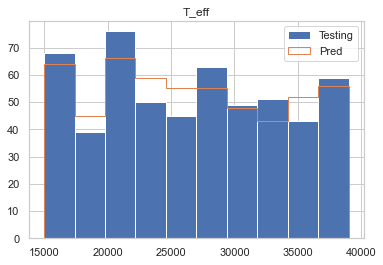

In [19]:
import seaborn as sns


sns.set_theme(style="whitegrid")

plt.figure()
plt.hist(y_test[:,0], label="Testing")
plt.hist(y_multirf[:,0], label="Pred", histtype='step')
plt.title("T_eff")
plt.legend(loc="best")
plt.show()

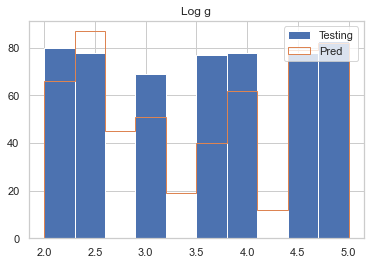

In [20]:
plt.figure()
plt.hist(y_test[:,1], label="Testing")
plt.hist(y_multirf[:,1], label="Pred", histtype='step')
plt.title("Log g")
plt.legend(loc="best")
plt.show()

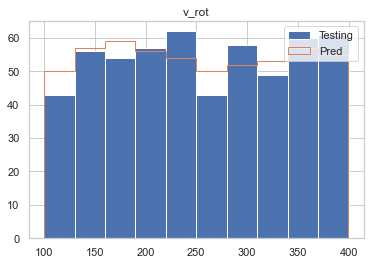

In [21]:
plt.figure()
plt.hist(y_test[:,2], label="Testing")
plt.hist(y_multirf[:,2], label="Pred", histtype='step')
plt.title("v_rot")
plt.legend(loc="best")
plt.show()

In [22]:
df = pd.read_csv("BESOS/2_Be_stars/HD33328/PUCHEROS/hd33328_2013-02-26_00-55-34_final_corr.txt", sep="\t", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

n = 201  # for 2 random indices
index = np.random.choice(df2[0].shape[0], n, replace=False) 

<ipython-input-22-b574c06a30c6>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


In [23]:
index.sort()

In [24]:
obs_wave = df2[0].values[index]
obs_flux = df2[1].values[index]

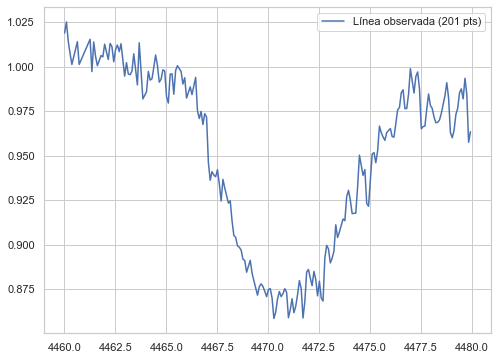

In [26]:
plt.figure(figsize=(8,6))
plt.plot(obs_wave, obs_flux, label="Línea observada (201 pts)")
#plt.plot(df4[0], df4[1], label="Modelo")
plt.legend(loc="best")
plt.show()

In [27]:
pred_obs = regr_multirf.predict(obs_flux.reshape(1,201))

In [28]:
pred_obs

array([[3.15900000e+04, 3.35145238e+00, 2.77500000e+02]])

In [29]:
print(pred_obs[0,0])
print(pred_obs[0,1])
print(pred_obs[0,2])

31590.0
3.351452380952381
277.5


In [30]:
X.min()

0.6657186

In [31]:
X.max()

1.002509